<a href="https://colab.research.google.com/github/pmecwan/MAT-421/blob/main/Module_H_Section_22_1%2C_22_2%2C_22_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.1 ODE Initial Value Problem Statement

A differential equation describes the relationship between a function
f(x), its independent variable x, and any number of its derivatives. An ordinary differential equation (ODE) is a type of differential equation where the independent variable are one-dimensional, where F is an arbitrary function incorporating some or all of its arguments, and n represents the order of the differential equation. A partial differential equation (PDE) involves multiple independent variables and partial derivatives of any order with respect to any combination of these variables. The general solution to a differential equation is a function g(x) that satisfies the equation, while a particular solution p(x) not only satisfies the ODE but also meets n explicitly specified conditions—such as known values of the solution, its derivatives, or specific points. When these conditions are given at a single point (often the starting point), they are called initial values, and the problem of finding the corresponding solution is termed an initial value problem (IVP).

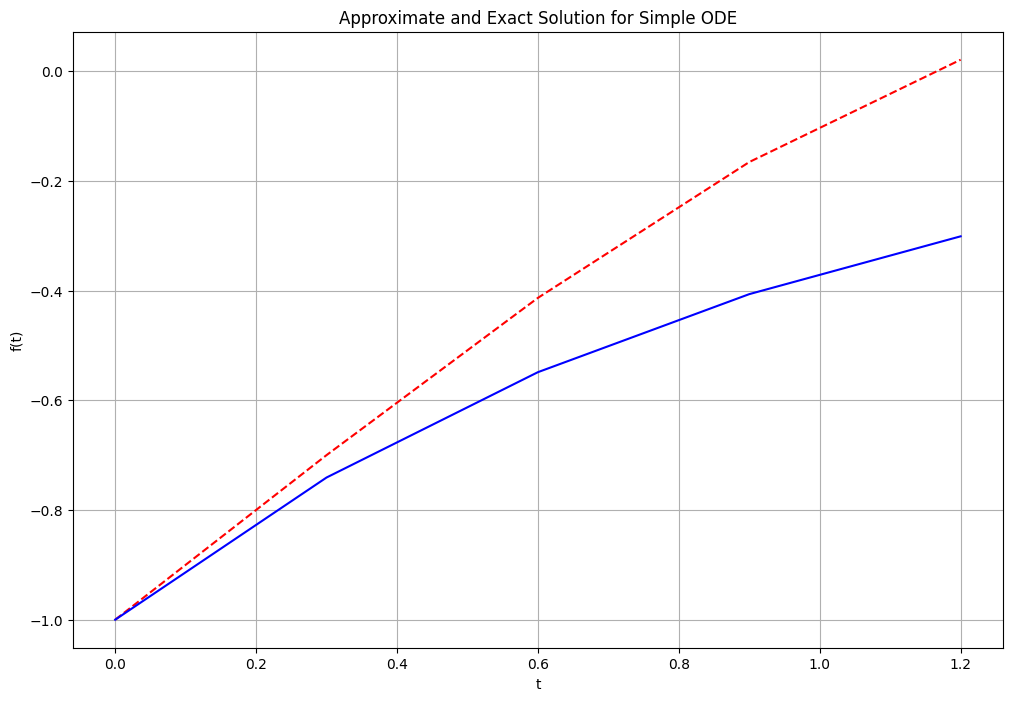

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

g = lambda t, s: np.cos(t)
h1 = 0.3
t = np.arange(0, 1 + h1, h1)
s0 = -1.0


s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h1*g(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'r--', label='Approximate')
plt.plot(t, -np.exp(-t), 'b', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.show()

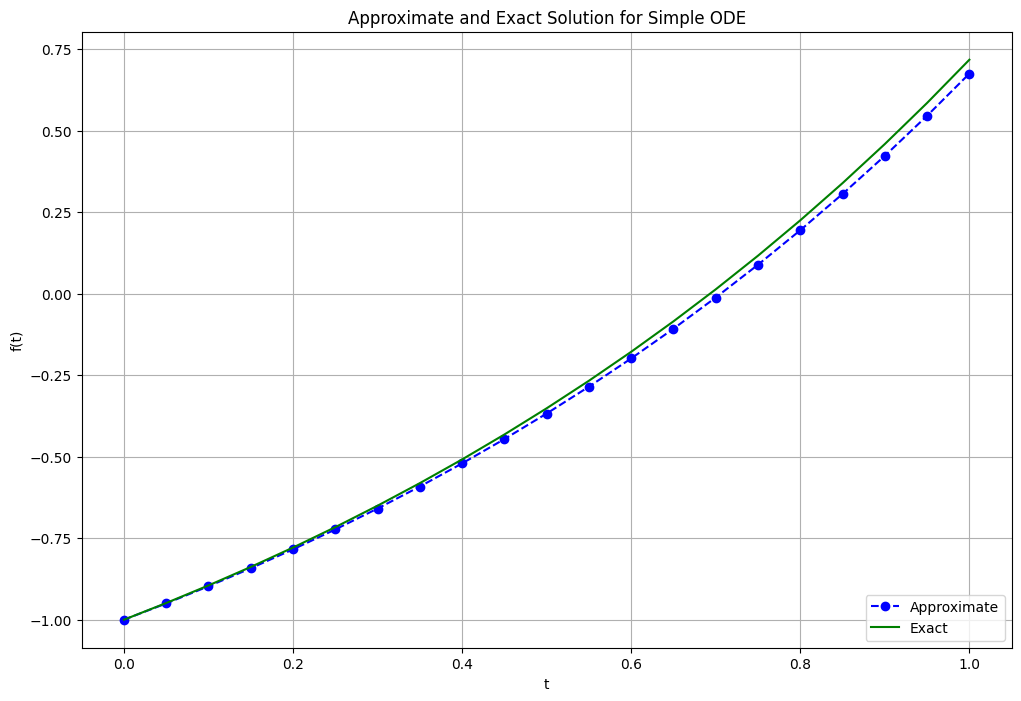

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

f = lambda t, s: np.exp(t)
h = 0.05
t = np.arange(0, 1 + h, h)
s0 = -1

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.exp(t)-2, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

22.2 Reduction of Order

To reduce the order of a higher-order ordinary differential equation (ODE), we can transform it into a system of first-order ODEs. This involves defining the state of the system, S(t), which is a collection of all dependent variables (and their derivatives) that describe the system's behavior. An n-th order ODE can be decomposed into n coupled first-order ODEs, meaning they share interdependent terms. For linear ODEs, this system can be expressed in matrix form, where the state S(t) encapsulates the relevant variables and their derivatives—provided all derivatives are taken with respect to the same independent variable. This approach simplifies analysis and enables numerical solution techniques.

In [11]:
import functools

lis = [1, 3, 5, 6, 2, ]

print("The sum of the list elements is : ", end="")
print(functools.reduce(lambda a, b: a+b, lis))

print("The maximum element of the list is : ", end="")
print(functools.reduce(lambda a, b: a if a > b else b, lis))

The sum of the list elements is : 17
The maximum element of the list is : 6


In [12]:
import functools

import operator

lis = [1, 3, 5, 6, 2, ]

print("The sum of the list elements is : ", end="")
print(functools.reduce(operator.add, lis))

print("The product of list elements is : ", end="")
print(functools.reduce(operator.mul, lis))

print("The concatenated product is : ", end="")
print(functools.reduce(operator.add, ["MAT", "421", " Chapter 22"]))

The sum of the list elements is : 17
The product of list elements is : 180
The concatenated product is : MAT421 Chapter 22


22.3 The Euler Method

The Euler Method is a simple numerical technique for solving initial value problems (IVPs) by approximating a function's behavior using its derivative. Starting from a known point, it estimates the next value by moving a small step h in the direction of the derivative. The Explicit Euler Formula computes. While intuitive and easy to implement, this method assumes the derivative remains constant over the interval, leading to errors if h is too large.

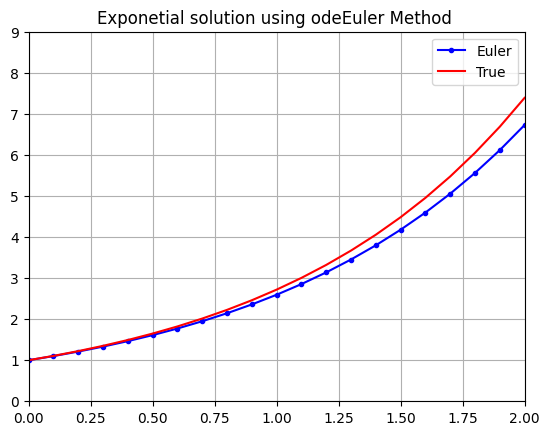

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def odeEuler(f,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y
t = np.linspace(0,2,21)
y0 = 1
f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Exponetial solution using odeEuler Method ")
plt.show()

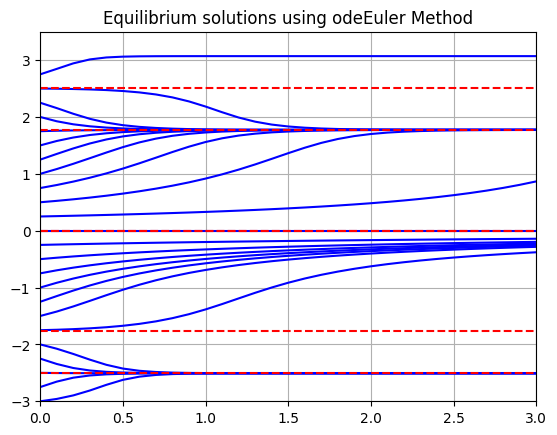

In [17]:
t0 = 0; tf = 3; h = 0.1;

f = lambda y,t: np.sin(y**2)

t = np.arange(t0,tf+h,h)

for y0 in np.arange(-3,3,0.25):
    y = odeEuler(f,y0,t)
    plt.plot(t,y,'b')

for k in range(0,3):
    y_eq = np.sqrt(k*np.pi)
    plt.plot([t0,tf],[y_eq,y_eq],'r--')
    plt.plot([t0,tf],[-y_eq,-y_eq],'r--')

plt.grid(True)
plt.axis([0,3,-3,3.5])
plt.title("Equilibrium solutions using odeEuler Method")
plt.show()